In [1]:
from glip_glorp import *

# Data

In [2]:
# initializting
runtimes = []

# looping in files
glorp = []

with open('mesh_size/mesh_size_l2_runtimes.txt', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
       glorp.append(row)

# setting arrays
grid_divisions = glorp[0]

for i in range(1,len(glorp)):
    toAppend = [float(j) for j in glorp[i]]
    runtimes.append(toAppend)

# Plotting

## Cumulative

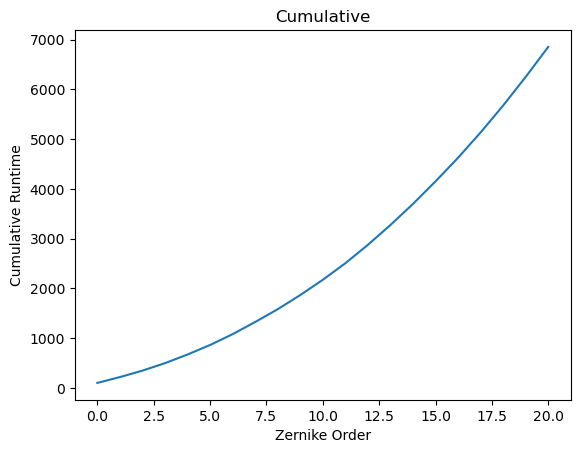

In [31]:
# for gd = 1e4
times = runtimes[-1]

plt.plot(times)
plt.title('Cumulative')
plt.xlabel('Zernike Order'), plt.ylabel('Cumulative Runtime')
plt.show()

## Noncumulative

r$^2$ = 0.9925222638851466


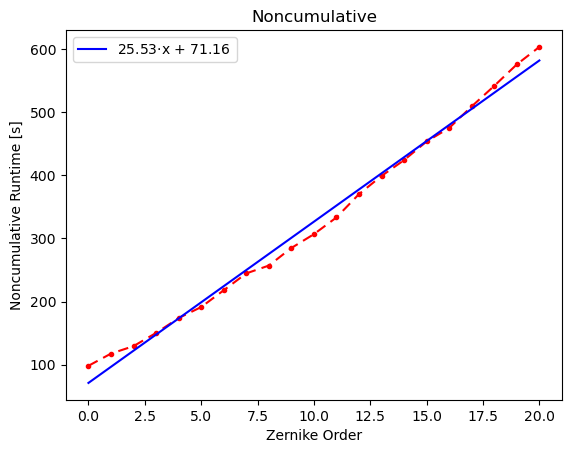

In [32]:
times_per_order = []
times_per_order.append(times[0])

for i in range(1,len(times)):
    times_per_order.append(times[i] - times[i-1])

orders = np.arange(0,21)
m,b,r,p,stderr = sy.stats.linregress(orders,times_per_order)

plt.plot(orders, times_per_order, '.', linestyle=(0,(5,3)), color='r')
plt.plot(orders, m*orders+b, color='b', label='{}$\cdot$x + {}'.format(round(m,2),round(b,4)))
plt.title('Noncumulative'), plt.legend()
plt.xlabel('Zernike Order'), plt.ylabel('Noncumulative Runtime [s]')
print('r$^2$ = {}'.format(r**2))
plt.show()

## Per Term

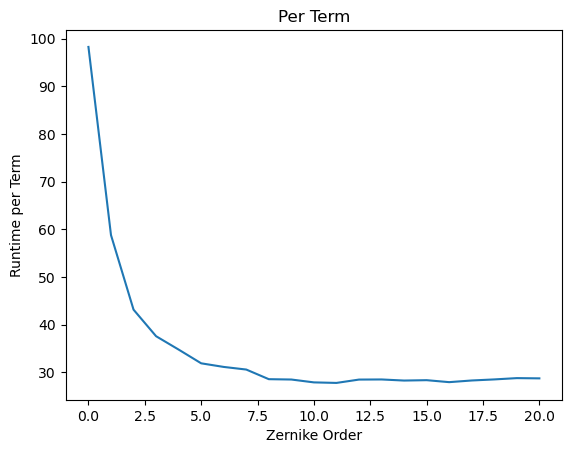

In [25]:
times_per_term = []

for i in range(len(times_per_order)):
    times_per_term.append(times_per_order[i] / (i+1))

plt.plot(times_per_term), plt.title('Per Term')
plt.xlabel('Zernike Order'), plt.ylabel('Runtime per Term')
plt.show()

### Checking Runtime on Each

In [44]:
p,R0 = 8,5
rho,phi = gen_rhophi(1000)
r,theta = gen_rtheta(rho,phi,p,R0)


glip = []
for n in range(21):
    ms = np.arange(-n,n+1,2)
    for m in ms:
        ti = time.time()
        _ = fk_m(n,m,r,theta,p,R0)
        te = time.time()

        runtime = te-ti
        print('n={},m={},t={}'.format(n,m,runtime))
        glip.append(runtime)

n=0,m=0,t=0.15737152099609375
n=1,m=-1,t=0.16784048080444336
n=1,m=1,t=0.17455482482910156
n=2,m=-2,t=0.16859936714172363
n=2,m=0,t=0.16573882102966309
n=2,m=2,t=0.1586475372314453
n=3,m=-3,t=0.16956591606140137
n=3,m=-1,t=0.1757063865661621
n=3,m=1,t=0.17927289009094238
n=3,m=3,t=0.1614389419555664
n=4,m=-4,t=0.16278481483459473
n=4,m=-2,t=0.172166109085083
n=4,m=0,t=0.17141962051391602
n=4,m=2,t=0.18871235847473145
n=4,m=4,t=0.17061519622802734
n=5,m=-5,t=0.16026854515075684
n=5,m=-3,t=0.18373537063598633
n=5,m=-1,t=0.1956169605255127
n=5,m=1,t=0.20247769355773926
n=5,m=3,t=0.18328309059143066
n=5,m=5,t=0.16565942764282227
n=6,m=-6,t=0.1654360294342041
n=6,m=-4,t=0.18415284156799316
n=6,m=-2,t=0.20420145988464355
n=6,m=0,t=0.18624424934387207
n=6,m=2,t=0.18535804748535156
n=6,m=4,t=0.18938779830932617
n=6,m=6,t=0.17230987548828125
n=7,m=-7,t=0.17629623413085938
n=7,m=-5,t=0.1813809871673584
n=7,m=-3,t=0.1914072036743164
n=7,m=-1,t=0.2027113437652588
n=7,m=1,t=0.20548725128173828
n=7,

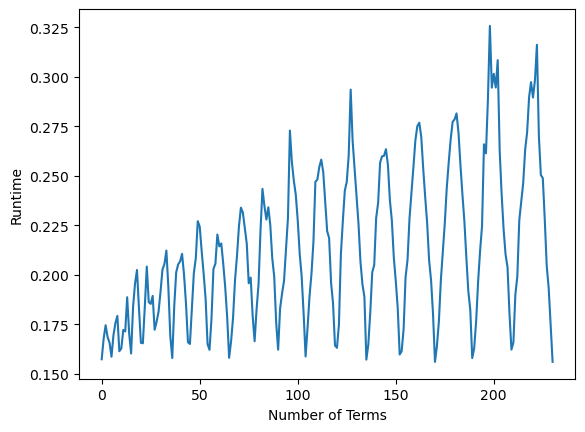

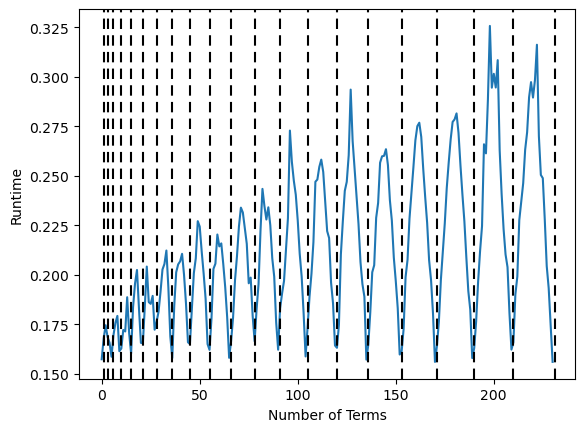

In [54]:
glip = np.array(glip)
plt.plot(glip)
plt.xlabel('Number of Terms'), plt.ylabel('Runtime')
plt.show()

plt.plot(glip)
plt.xlabel('Number of Terms'), plt.ylabel('Runtime')
total = 0
for i in range(21):
    total += i+1
    plt.axvline(total, color='k', linestyle=(0,(5,3)))
plt.show()